# **Imports**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error              
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MAPE


# **Import Data From Yahoo and create dataframe for first stock**


In [ ]:
# Fetch dataset
#TODO: Pick the stock you want to predict
#df = web.DataReader("XOM", data_source="yahoo", start="1997-01-01", end="2020-01-01") #BP/LUKOY/XOM
#df = web.DataReader("IBM", data_source="yahoo", start="1990-01-01", end="2020-01-01") #INTC/IBM/MSFT
df = web.DataReader("TTM", data_source="yahoo", start="2004-09-26", end="2020-01-01") #F/TM/TTM

#Dropping a colum from dataframe
df = df.drop(['Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2004-09-27,9.28,9.05,9.15,9.15,379700.0
2004-09-28,8.85,8.65,8.85,8.76,332700.0
2004-09-29,8.78,8.66,8.76,8.75,119800.0
2004-09-30,8.97,8.89,8.89,8.97,166400.0
2004-10-01,9.34,9.12,9.14,9.25,266600.0


# **Data info and plot for first stock**

In [ ]:
# Display dataset info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3843 entries, 2004-09-27 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    3843 non-null   float64
 1   Low     3843 non-null   float64
 2   Open    3843 non-null   float64
 3   Close   3843 non-null   float64
 4   Volume  3843 non-null   float64
dtypes: float64(5)
memory usage: 180.1 KB


,High,Low,Open,Close,Volume
count,3843.000000,3843.000000,3843.000000,3843.000000,3.843000e+03
mean,22.583219,22.089428,22.352831,22.342873,1.372404e+06
std,10.539886,10.388647,10.462833,10.459595,9.189656e+05
min,3.410000,3.050000,3.170000,3.140000,0.000000e+00
25%,13.765000,13.365000,13.500000,13.600000,7.774500e+05
50%,20.700001,20.219999,20.500000,20.430000,1.206100e+06
75%,29.765000,29.240000,29.474999,29.485000,1.771400e+06
max,51.799999,50.650002,51.259998,51.470001,1.085910e+07


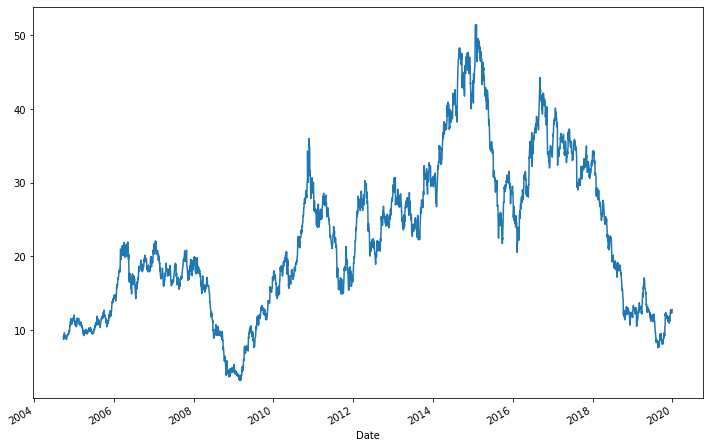

In [ ]:
# Illustrate closing price data
df['Close'].plot(figsize=(12,8))

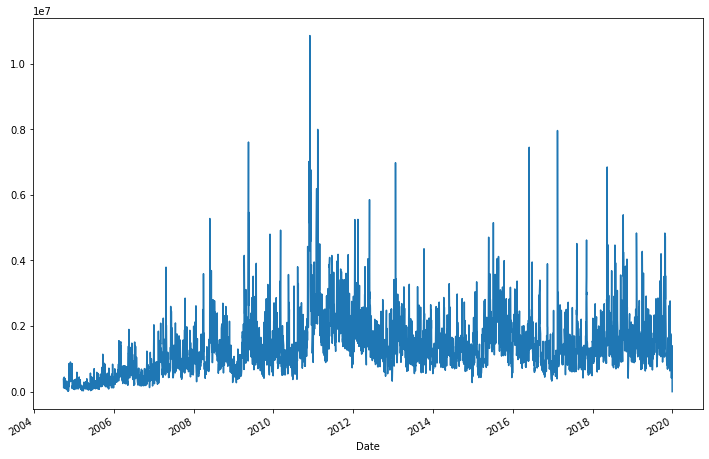

In [ ]:
# Illustrate volume data
df['Volume'].plot(figsize=(12,8))

# **Scale and split data for first stock**

In [ ]:
# Round off the data to two decimals, to remove excess noice
df = df.round(2)

# Scale the data
scaler_high = MinMaxScaler()
scaler_low = MinMaxScaler()
scaler_open = MinMaxScaler()
scaler_close = MinMaxScaler()
scaler_volume = MinMaxScaler()

# Reshape
high_value = df['High'].values
high_value = high_value.reshape(len(high_value), 1)

low_value = df['Low'].values
low_value = low_value.reshape(len(low_value), 1)

open_value = df['Open'].values
open_value = open_value.reshape(len(open_value), 1)

close_value = df['Close'].values
close_value = close_value.reshape(len(close_value), 1)

volume_value = df['Volume'].values
volume_value = volume_value.reshape(len(volume_value), 1)

# Fit scaler to training data
scaler_high.fit(high_value)
scaler_low.fit(low_value)
scaler_open.fit(open_value)
scaler_close.fit(close_value)
scaler_volume.fit(volume_value)

# Scaler transformation
scaled_high = scaler_high.transform(high_value)
scaled_low = scaler_low.transform(low_value)
scaled_open = scaler_open.transform(open_value)
scaled_close = scaler_close.transform(close_value)
scaled_volume = scaler_volume.transform(volume_value)

# Combine data 
df['scaled_high'] = scaled_high
df['scaled_low'] = scaled_low
df['scaled_open'] = scaled_open
df['scaled_close'] = scaled_close
df['scaled_volume'] = scaled_volume

normalizedData = df[["scaled_high", "scaled_low", "scaled_open", "scaled_close", "scaled_volume"]].values

In [ ]:
x = []
y = []

for i in range (0,len(normalizedData)-65):
  x.append(normalizedData[i:i+60])
  y.append(normalizedData[i+60:i+65, 3])

In [ ]:
cropped_df = df.tail(-60).head(-5)

# Split into training set (80%) and test set (20%)
split_off_index = round(len(cropped_df)*0.80)

# Split into test set and training set (for evaluation)
train_eval = cropped_df.iloc[:split_off_index]
test_eval = cropped_df.iloc[split_off_index:]

# Split into training set and test set (for training)
train_x = x[:split_off_index]
train_y = y[:split_off_index]

test_x = x[split_off_index:]
test_y = y[split_off_index:]

# Convert to numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)


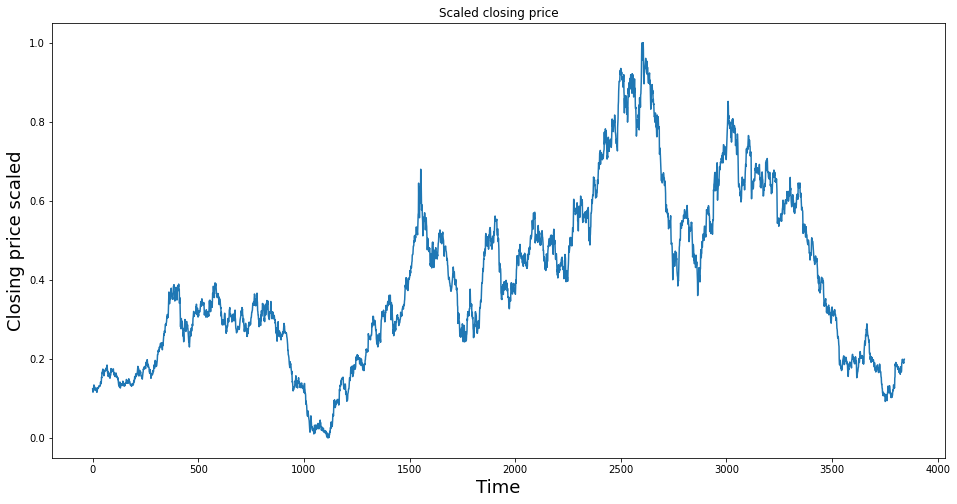

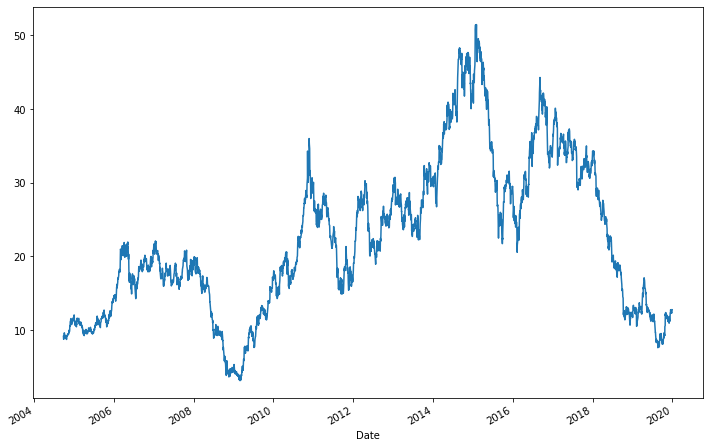

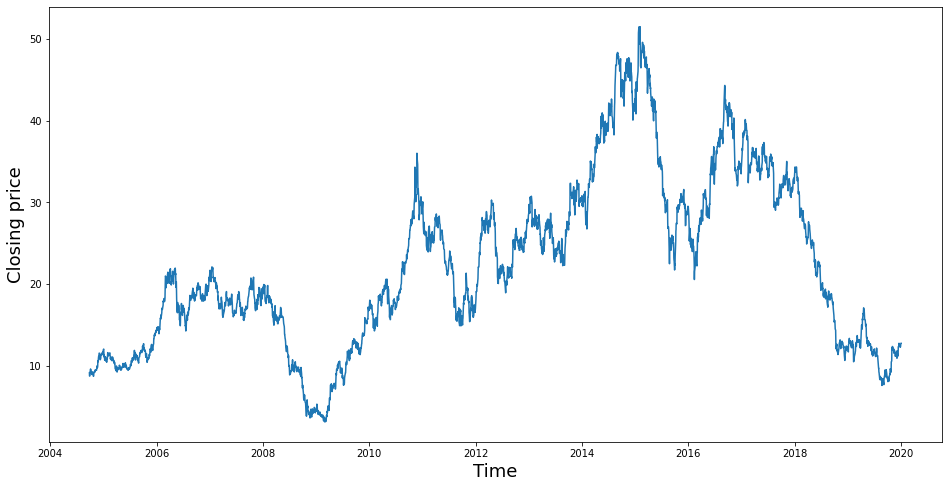

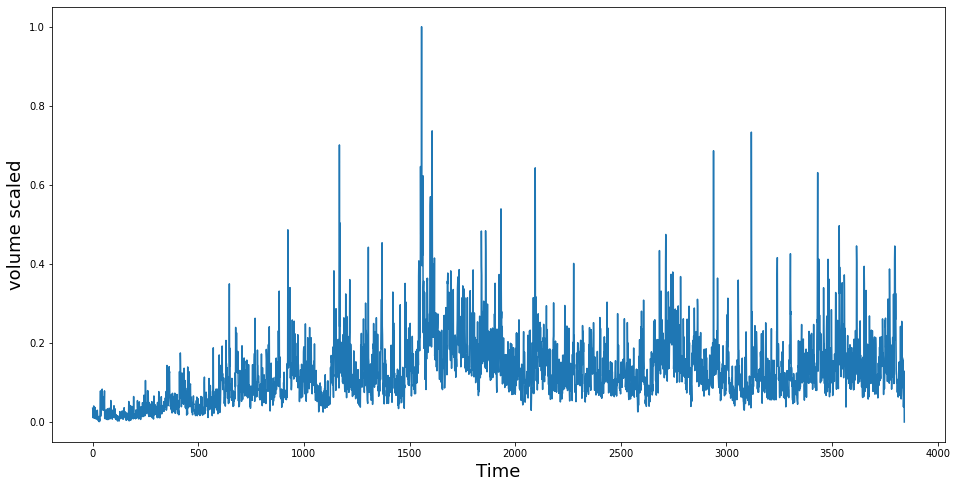

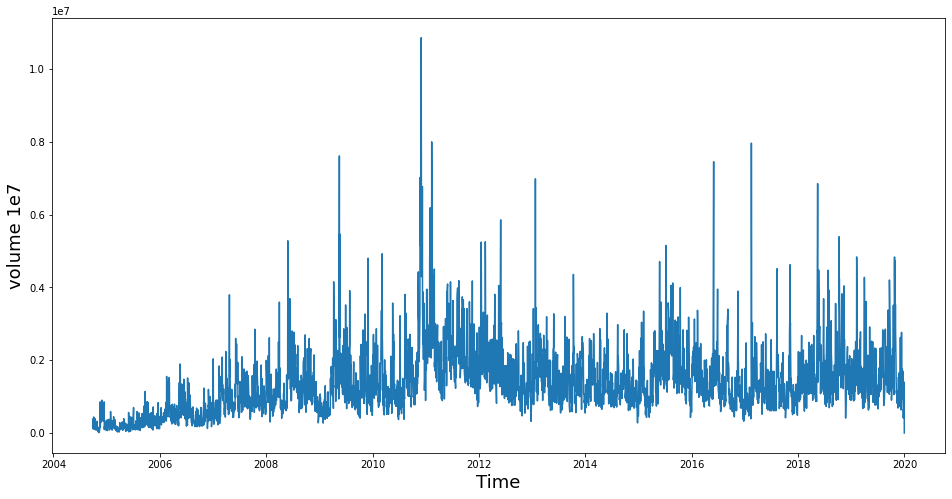

In [ ]:
# Plot Scaled prices
plt.figure(figsize=(16,8))
plt.title('Scaled closing price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing price scaled', fontsize=18)
plt.plot(normalizedData[:,3])
plt.show()


df['Close'].plot(figsize=(12,8))

plt.figure(figsize=(16,8))

plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing price', fontsize=18)
plt.plot(df.Close)
plt.show()

plt.figure(figsize=(16,8))

plt.xlabel('Time', fontsize=18)
plt.ylabel('volume scaled',fontsize =18)
plt.plot(normalizedData[:,4])
plt.show()

plt.figure(figsize=(16,8))

plt.xlabel('Time', fontsize=18)
plt.ylabel('volume 1e7',fontsize =18)
plt.plot(df.Volume)
plt.show()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4578, 60, 5) (4578, 5) (1145, 60, 5) (1145, 5)


# **Create the models**

In [ ]:
# Define the model
model_1_layer = Sequential()
model_3_layer = Sequential()

# Add LSTM layer for 1 layer model
model_1_layer.add(LSTM(128, input_shape=(train_x.shape[1], train_x.shape[2])))
model_1_layer.add(Dropout(0.2))


# Add LSTM layer for 3 layer model
model_3_layer.add(LSTM(128, return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model_3_layer.add(Dropout(0.2))

model_3_layer.add(LSTM(64, return_sequences=True))
model_3_layer.add(Dropout(0.2))

model_3_layer.add(LSTM(32))
model_3_layer.add(Dropout(0.2))

# Final Prediction - 5 outputs, 5 neurons
model_1_layer.add(Dense(5))
model_3_layer.add(Dense(5))

#Compile
model_1_layer.compile(optimizer='adam', loss='mse')
model_3_layer.compile(optimizer='adam', loss='mse')

In [ ]:
model_1_layer.summary()
model_3_layer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               68608     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 128)           68608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
______________________________

# **Train individual models on the first stock**

Epoch 1/200
95/95 [==============================] - 6s 60ms/step - loss: 0.0213 - val_loss: 5.3120e-04
Epoch 2/200
95/95 [==============================] - 5s 54ms/step - loss: 0.0049 - val_loss: 5.9020e-04
Epoch 3/200
95/95 [==============================] - 5s 57ms/step - loss: 0.0039 - val_loss: 4.7602e-04
Epoch 4/200
95/95 [==============================] - 5s 54ms/step - loss: 0.0034 - val_loss: 4.2541e-04
Epoch 5/200
95/95 [==============================] - 5s 56ms/step - loss: 0.0032 - val_loss: 5.7601e-04
Epoch 6/200
95/95 [==============================] - 5s 57ms/step - loss: 0.0030 - val_loss: 3.9456e-04
Epoch 7/200
95/95 [==============================] - 5s 58ms/step - loss: 0.0028 - val_loss: 3.4627e-04
Epoch 8/200
95/95 [==============================] - 5s 57ms/step - loss: 0.0026 - val_loss: 3.6064e-04
Epoch 9/200
95/95 [==============================] - 5s 56ms/step - loss: 0.0024 - val_loss: 3.3871e-04
Epoch 10/200
95/95 [==============================] - 5s 56ms/st

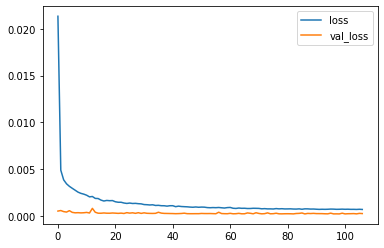

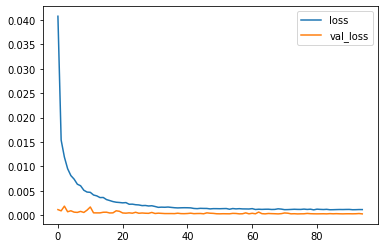

In [ ]:
# Early stop
early_stop = EarlyStopping(monitor='val_loss',patience=20)

# Fit model
def fit_models():
  model_1_layer.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_y), callbacks=[early_stop], batch_size=32)
  model_3_layer.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_y), callbacks=[early_stop,], batch_size=32)

  losses_1_layer = pd.DataFrame(model_1_layer.history.history)
  losses_1_layer.plot()
  losses_3_layer = pd.DataFrame(model_3_layer.history.history)
  losses_3_layer.plot()
fit_models()

# **Let each model make predictions on the test data for the first stock**


In [ ]:
#Create loop and predict
n_features = 5
test_predictions_1_layer = []
test_predictions_3_layer = []


for i in range(0,len(test_x)):
    test_batch = test_x[i]
    reshaped_batch = test_batch.reshape((1, 60, n_features))
    
    # get prediction 1-5 time stamps ahead ([0] is for grabbing just the number instead of [array])
    current_pred_1_layer = model_1_layer.predict(reshaped_batch)[0]
    current_pred_3_layer = model_3_layer.predict(reshaped_batch)[0]
    
    # store prediction
    test_predictions_1_layer.append(current_pred_1_layer)
    test_predictions_3_layer.append(current_pred_3_layer)  

# Inverse transform
true_predictions_1_layer = scaler_close.inverse_transform(test_predictions_1_layer)
true_predictions_3_layer = scaler_close.inverse_transform(test_predictions_3_layer)

# **Compare the actual closing price to the predicted closing price for each model and calculate evaluation metrics (MAPE and RMSE) for each of the 5 predicted days**

In [ ]:
result_array_1_layer = []
result_array_3_layer = []
date_array = []
for i in range(5, len(test_eval)):
  temp_pred_array_1_layer = []
  temp_pred_array_3_layer = []
  date_array.append(test_eval.index[i])
  temp_pred_array_1_layer.append(test_eval['Close'].values[i])
  temp_pred_array_3_layer.append(test_eval['Close'].values[i])
  for j in range(1,6):
    temp_pred_array_1_layer.append(true_predictions_1_layer[i-j][j-1])
    temp_pred_array_3_layer.append(true_predictions_3_layer[i-j][j-1])
  result_array_1_layer.append(temp_pred_array_1_layer)
  result_array_3_layer.append(temp_pred_array_3_layer)


In [ ]:
# Create result dataframes
res_df_1_layer = pd.DataFrame(result_array_1_layer, columns = ['Actual price','1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"])
res_df_1_layer.index = date_array
res_df_3_layer = pd.DataFrame(result_array_3_layer, columns = ['Actual price','1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"])
res_df_3_layer.index = date_array

In [ ]:
# Calculate MAPE and RMSE for 1-5 day predictions
evaluation_array_1_layer = []
evaluation_array_3_layer = []
for i in range (1,6):
  mape_err_1_layer = MAPE(res_df_1_layer.iloc[:,0], res_df_1_layer.iloc[:,i]).numpy().round(4)
  mape_err_3_layer = MAPE(res_df_3_layer.iloc[:,0], res_df_3_layer.iloc[:,i]).numpy().round(4)
  rmse_err_1_layer = np.sqrt(mean_squared_error(res_df_1_layer.iloc[:,0], res_df_1_layer.iloc[:,i])).round(4)
  rmse_err_3_layer = np.sqrt(mean_squared_error(res_df_3_layer.iloc[:,0], res_df_3_layer.iloc[:,i])).round(4)
  evaluation_array_1_layer.append([mape_err_1_layer, rmse_err_1_layer])
  evaluation_array_3_layer.append([mape_err_3_layer, rmse_err_3_layer])

error_df_1_layer = pd.DataFrame(evaluation_array_1_layer, columns = ['MAPE','RMSE'])
error_df_1_layer.index = ['1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"]
print("Single model 1 layer network")
print(error_df_1_layer)
print()
error_df_3_layer = pd.DataFrame(evaluation_array_3_layer, columns = ['MAPE','RMSE'])
error_df_3_layer.index = ['1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"]
print("Single model 3 layer network")
print(error_df_3_layer)

Single model 1 layer network
                    MAPE    RMSE
1 day prediction  1.7595  0.2427
2 day prediction  2.0835  0.2834
3 day prediction  2.4383  0.3262
4 day prediction  2.6716  0.3558
5 day prediction  2.9694  0.3925

Single model 3 layer network
                    MAPE    RMSE
1 day prediction  1.6796  0.2291
2 day prediction  2.0275  0.2729
3 day prediction  2.3388  0.3089
4 day prediction  2.6305  0.3429
5 day prediction  2.9288  0.3768


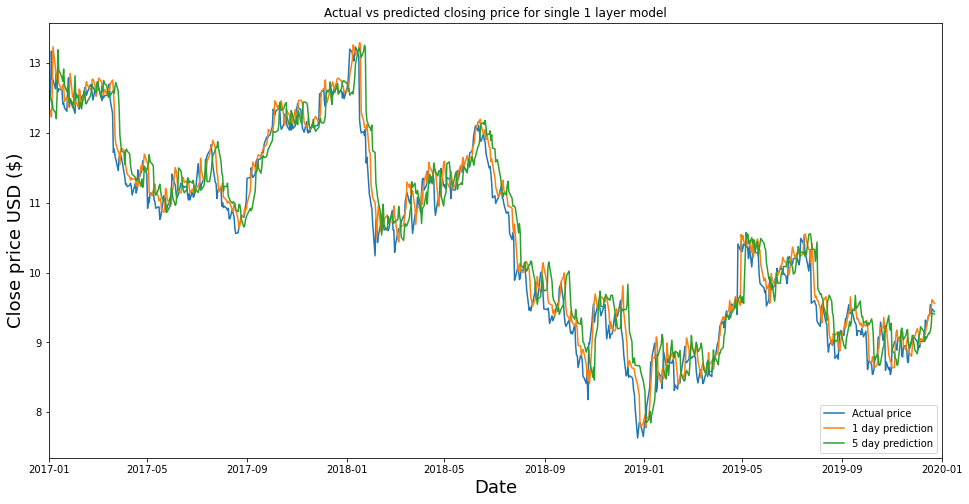

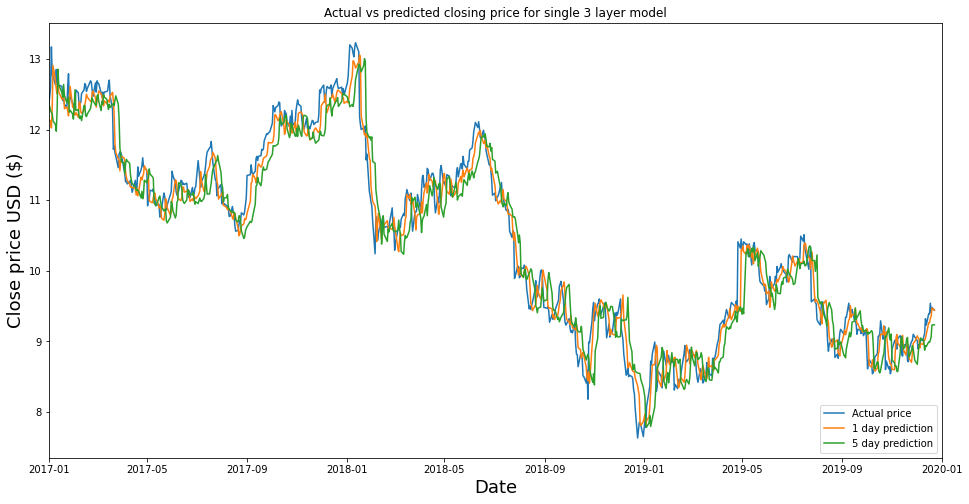

In [ ]:
#TODO: Fikse aksene her så de er slik vi vil ha de

# Plot actual closing price against predicted closing price for 1 layer model
plt.figure(figsize=(16,8))
plt.title('Actual vs predicted closing price for single 1 layer model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(res_df_1_layer['Actual price'])
plt.plot(res_df_1_layer['1 day prediction'])
plt.plot(res_df_1_layer['5 day prediction'])
plt.xlim(datetime.date(2017,1,1), datetime.date(2020,1,1))
plt.legend(['Actual price', '1 day prediction', "5 day prediction"], loc='lower right')
plt.show()

# Plot actual closing price against predicted closing price for 3 layer model
plt.figure(figsize=(16,8))
plt.title('Actual vs predicted closing price for single 3 layer model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(res_df_3_layer['Actual price'])
plt.plot(res_df_3_layer['1 day prediction'])
plt.plot(res_df_3_layer['5 day prediction'])
plt.xlim(datetime.date(2017,1,1), datetime.date(2020,1,1))
plt.legend(['Actual price', '1 day prediction', "5 day prediction"], loc='lower right')
plt.show()

# **Save single models to google drive (optional)**

In [ ]:
#Save and load model imports
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

#TODO: Change save names 
# Save models
model_1_layer.save('Single-1-layer-model-F.h5')
model_1_layer_file = drive.CreateFile({'title' : 'Single-1-layer-model-F.h5'})                       
model_1_layer_file.SetContentFile('Single-1-layer-model-F.h5')                       
model_1_layer_file.Upload()

model_3_layer.save('Single-3-layer-model-F.h5')
model_3_layer_file = drive.CreateFile({'title' : 'Single-3-layer-model-F.h5'})                       
model_3_layer_file.SetContentFile('Single-3-layer-model-F.h5')                       
model_3_layer_file.Upload()
 
#Get drive ID - MAKE SURE TO SAVE THE ID SOMEWHERE
print("Single 1 layer model:")              
print(drive.CreateFile({'id': model_1_layer_file.get('id')}))
print("Single 3 layer model:")  
print(drive.CreateFile({'id': model_3_layer_file.get('id')}))


Single 1 layer model:
GoogleDriveFile({'id': '10E1xN2tU3sNMPqR4SdRbnj6gcwihnE7p'})
Single 3 layer model:
GoogleDriveFile({'id': '1q10SGgSS3cnh9y1dmyr7anH43j6zV_xA'})


# **Import Data From Yahoo and create dataframe for second stock**


In [ ]:
# Fetch dataset
#TODO: Pick the stock you want to predict
#df = web.DataReader("LUKOY", data_source="yahoo", start="1997-01-01", end="2020-01-01") #BP/LUKOY/XOM 
#df = web.DataReader("IBM", data_source="yahoo", start="1990-01-01", end="2020-01-01") #INTC/IBM/MSFT 
df = web.DataReader("TM", data_source="yahoo", start="2004-09-26", end="2020-01-01") #Ford/TM/TTM

#Dropping a colum from dataframe
df = df.drop(['Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2004-09-27,75.000000,74.010002,74.169998,74.059998,437200.0
2004-09-28,73.980003,73.300003,73.599998,73.779999,300200.0
2004-09-29,73.949997,73.540001,73.699997,73.910004,186100.0
2004-09-30,76.680000,75.790001,76.150002,76.379997,276600.0
2004-10-01,77.750000,76.500000,76.879997,77.519997,253200.0


# **Scale and split data for second stock**

In [ ]:
# Round off the data to two decimals, to remove excess noice
df = df.round(2)

# Scale the data
scaler_high = MinMaxScaler()
scaler_low = MinMaxScaler()
scaler_open = MinMaxScaler()
scaler_close = MinMaxScaler()
scaler_volume = MinMaxScaler()

# Reshape
high_value = df['High'].values
high_value = high_value.reshape(len(high_value), 1)

low_value = df['Low'].values
low_value = low_value.reshape(len(low_value), 1)

open_value = df['Open'].values
open_value = open_value.reshape(len(open_value), 1)

close_value = df['Close'].values
close_value = close_value.reshape(len(close_value), 1)

volume_value = df['Volume'].values
volume_value = volume_value.reshape(len(volume_value), 1)

# Fit scaler to training data
scaler_high.fit(high_value)
scaler_low.fit(low_value)
scaler_open.fit(open_value)
scaler_close.fit(close_value)
scaler_volume.fit(volume_value)

# Scaler transformation
scaled_high = scaler_high.transform(high_value)
scaled_low = scaler_low.transform(low_value)
scaled_open = scaler_open.transform(open_value)
scaled_close = scaler_close.transform(close_value)
scaled_volume = scaler_volume.transform(volume_value)

# Combine data 
df['scaled_high'] = scaled_high
df['scaled_low'] = scaled_low
df['scaled_open'] = scaled_open
df['scaled_close'] = scaled_close
df['scaled_volume'] = scaled_volume

normalizedData = df[["scaled_high", "scaled_low", "scaled_open", "scaled_close", "scaled_volume"]].values

In [ ]:
x = []
y = []

for i in range (0,len(normalizedData)-65):
  x.append(normalizedData[i:i+60])
  y.append(normalizedData[i+60:i+65, 3])  

In [ ]:
cropped_df = df.tail(-60).head(-5)

# Split into training set (85%) and test set (15%)
split_off_index = round(len(cropped_df)*0.80)

# Split into test set and training set (for evaluation)
train_eval = cropped_df.iloc[:split_off_index]
test_eval = cropped_df.iloc[split_off_index:]

# Split into training set and test set (for training)
train_x = x[:split_off_index]
train_y = y[:split_off_index]

test_x = x[split_off_index:]
test_y = y[split_off_index:]

# Convert to numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)


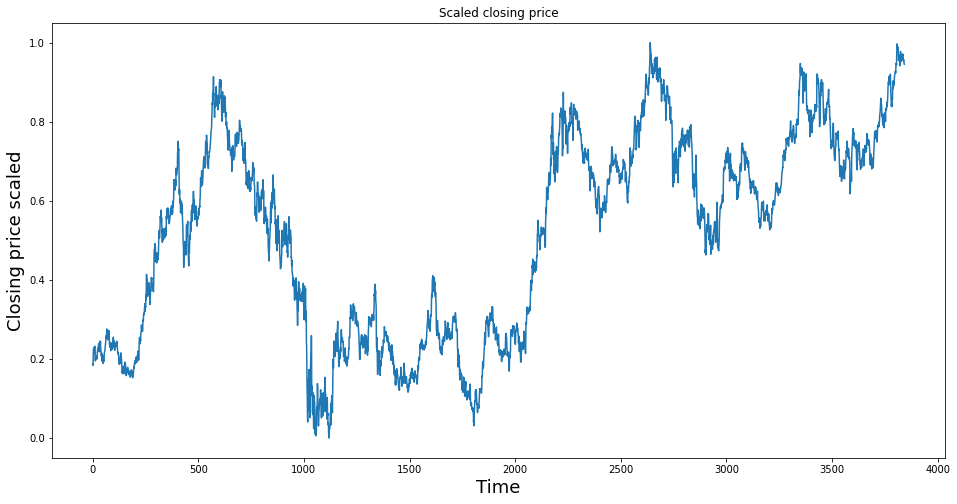

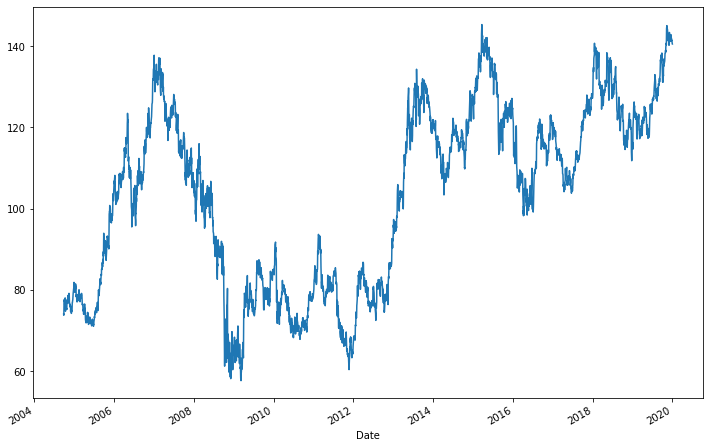

In [ ]:
# Plot Scaled prices
plt.figure(figsize=(16,8))
plt.title('Scaled closing price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing price scaled', fontsize=18)
plt.plot(normalizedData[:,3])
plt.show()

df['Close'].plot(figsize=(12,8))

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(3022, 60, 5) (3022, 5) (756, 60, 5) (756, 5)


# **Train the model on second stock**

Epoch 1/200
95/95 [==============================] - 5s 57ms/step - loss: 0.0013 - val_loss: 8.2009e-04
Epoch 2/200
95/95 [==============================] - 5s 55ms/step - loss: 0.0013 - val_loss: 9.4061e-04
Epoch 3/200
95/95 [==============================] - 5s 56ms/step - loss: 0.0013 - val_loss: 7.6567e-04
Epoch 4/200
95/95 [==============================] - 5s 55ms/step - loss: 0.0013 - val_loss: 9.3013e-04
Epoch 5/200
95/95 [==============================] - 5s 56ms/step - loss: 0.0013 - val_loss: 8.4349e-04
Epoch 6/200
95/95 [==============================] - 5s 56ms/step - loss: 0.0013 - val_loss: 8.0152e-04
Epoch 7/200
95/95 [==============================] - 5s 55ms/step - loss: 0.0013 - val_loss: 8.8148e-04
Epoch 8/200
95/95 [==============================] - 5s 54ms/step - loss: 0.0013 - val_loss: 7.6786e-04
Epoch 9/200
95/95 [==============================] - 5s 55ms/step - loss: 0.0013 - val_loss: 8.1765e-04
Epoch 10/200
95/95 [==============================] - 5s 56ms/st

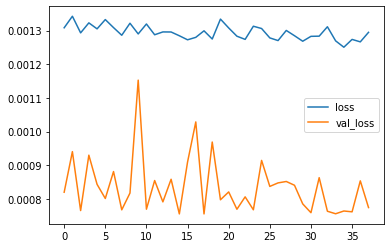

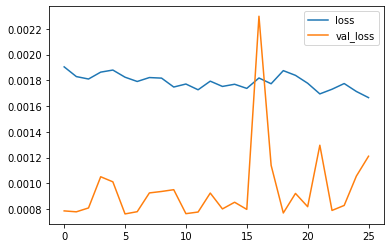

In [ ]:
# Early stop
early_stop = EarlyStopping(monitor='val_loss',patience=20)

# Fit model
def fit_models():
  model_1_layer.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_y), callbacks=[early_stop], batch_size=32)
  model_3_layer.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_y), callbacks=[early_stop,], batch_size=32)

  losses_1_layer = pd.DataFrame(model_1_layer.history.history)
  losses_1_layer.plot()
  losses_3_layer = pd.DataFrame(model_3_layer.history.history)
  losses_3_layer.plot()
fit_models()

# **Import Data From Yahoo and create dataframe for thrid stock**


In [ ]:
# Fetch dataset
#TODO: Pick the stock you want to predict
#df = web.DataReader("XOM", data_source="yahoo", start="1997-01-01", end="2020-01-01") #BP/Lukoil/XOM
#df = web.DataReader("MSFT", data_source="yahoo", start="1990-01-01", end="2020-01-01") #INTC/IBM/MSFT
df = web.DataReader("TTM", data_source="yahoo", start="2004-09-26", end="2020-01-01") #F/TM/TTM

#Dropping a colum from dataframe
df = df.drop(['Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2004-09-27,9.28,9.05,9.15,9.15,379700.0
2004-09-28,8.85,8.65,8.85,8.76,332700.0
2004-09-29,8.78,8.66,8.76,8.75,119800.0
2004-09-30,8.97,8.89,8.89,8.97,166400.0
2004-10-01,9.34,9.12,9.14,9.25,266600.0


# **Scale and split data for thrid stock**

In [ ]:
# Round off the data to two decimals, to remove excess noice
df = df.round(2)

# Scale the data
scaler_high = MinMaxScaler()
scaler_low = MinMaxScaler()
scaler_open = MinMaxScaler()
scaler_close = MinMaxScaler()
scaler_volume = MinMaxScaler()

# Reshape
high_value = df['High'].values
high_value = high_value.reshape(len(high_value), 1)

low_value = df['Low'].values
low_value = low_value.reshape(len(low_value), 1)

open_value = df['Open'].values
open_value = open_value.reshape(len(open_value), 1)

close_value = df['Close'].values
close_value = close_value.reshape(len(close_value), 1)

volume_value = df['Volume'].values
volume_value = volume_value.reshape(len(volume_value), 1)

# Fit scaler to training data
scaler_high.fit(high_value)
scaler_low.fit(low_value)
scaler_open.fit(open_value)
scaler_close.fit(close_value)
scaler_volume.fit(volume_value)

# Scaler transformation
scaled_high = scaler_high.transform(high_value)
scaled_low = scaler_low.transform(low_value)
scaled_open = scaler_open.transform(open_value)
scaled_close = scaler_close.transform(close_value)
scaled_volume = scaler_volume.transform(volume_value)

# Combine data 
df['scaled_high'] = scaled_high
df['scaled_low'] = scaled_low
df['scaled_open'] = scaled_open
df['scaled_close'] = scaled_close
df['scaled_volume'] = scaled_volume

normalizedData = df[["scaled_high", "scaled_low", "scaled_open", "scaled_close", "scaled_volume"]].values

In [ ]:
x = []
y = []

for i in range (0,len(normalizedData)-65):
  x.append(normalizedData[i:i+60])
  y.append(normalizedData[i+60:i+65, 3])  

In [ ]:
cropped_df = df.tail(-60).head(-5)

# Split into training set (85%) and test set (15%)
split_off_index = round(len(cropped_df)*0.80)

# Split into test set and training set (for evaluation)
train_eval = cropped_df.iloc[:split_off_index]
test_eval = cropped_df.iloc[split_off_index:]

# Split into training set and test set (for training)
train_x = x[:split_off_index]
train_y = y[:split_off_index]

test_x = x[split_off_index:]
test_y = y[split_off_index:]

# Convert to numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)


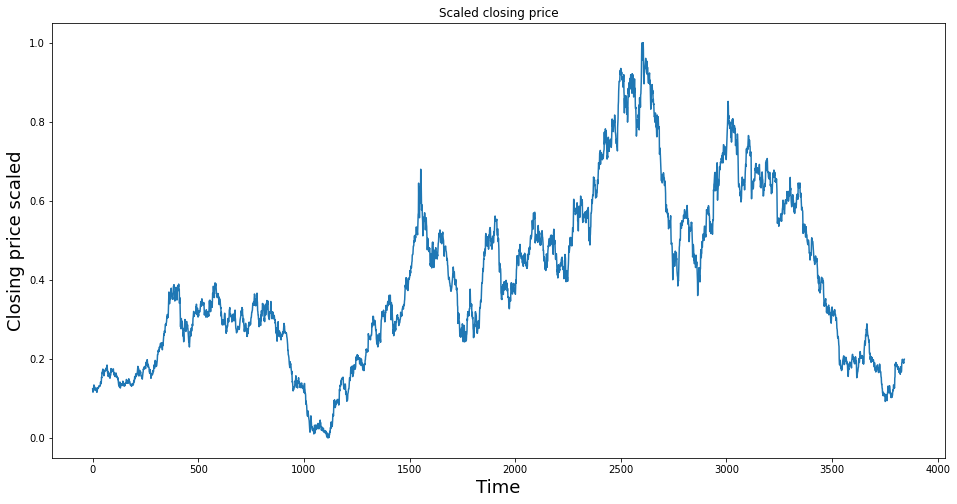

In [ ]:
# Plot Scaled prices
plt.figure(figsize=(16,8))
plt.title('Scaled closing price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing price scaled', fontsize=18)
plt.plot(normalizedData[:,3])
plt.show()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(3022, 60, 5) (3022, 5) (756, 60, 5) (756, 5)


# **Train the model on thrid stock**

Epoch 1/200
95/95 [==============================] - 6s 58ms/step - loss: 7.5630e-04 - val_loss: 4.7032e-04
Epoch 2/200
95/95 [==============================] - 5s 54ms/step - loss: 7.2512e-04 - val_loss: 4.6415e-04
Epoch 3/200
95/95 [==============================] - 5s 56ms/step - loss: 7.0211e-04 - val_loss: 4.6626e-04
Epoch 4/200
95/95 [==============================] - 5s 57ms/step - loss: 7.0384e-04 - val_loss: 4.6685e-04
Epoch 5/200
95/95 [==============================] - 5s 56ms/step - loss: 7.0991e-04 - val_loss: 4.6811e-04
Epoch 6/200
95/95 [==============================] - 5s 56ms/step - loss: 7.3239e-04 - val_loss: 5.0344e-04
Epoch 7/200
95/95 [==============================] - 5s 55ms/step - loss: 7.3129e-04 - val_loss: 6.7337e-04
Epoch 8/200
95/95 [==============================] - 5s 54ms/step - loss: 7.2684e-04 - val_loss: 4.9761e-04
Epoch 9/200
95/95 [==============================] - 5s 55ms/step - loss: 7.4542e-04 - val_loss: 5.3869e-04
Epoch 10/200
95/95 [========

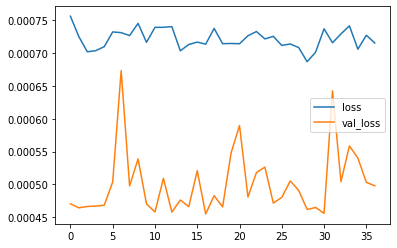

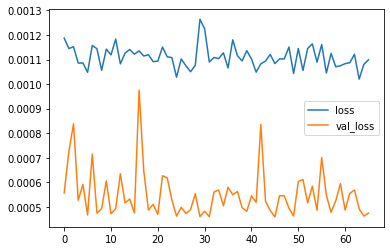

In [ ]:
# Early stop
early_stop = EarlyStopping(monitor='val_loss',patience=20)

# Fit model
def fit_models():
  model_1_layer.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_y), callbacks=[early_stop], batch_size=32)
  model_3_layer.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_y), callbacks=[early_stop,], batch_size=32)

  losses_1_layer = pd.DataFrame(model_1_layer.history.history)
  losses_1_layer.plot()
  losses_3_layer = pd.DataFrame(model_3_layer.history.history)
  losses_3_layer.plot()
fit_models()

# **Import Data From Yahoo and create dataframe for first stock again**


In [ ]:
# Fetch dataset
#TODO: Pick the stock you want to predict
#df = web.DataReader("BP", data_source="yahoo", start="1997-01-01", end="2020-01-01") #BP/LUKOY/XOM
#df = web.DataReader("INTC", data_source="yahoo", start="1990-01-01", end="2020-01-01") #INTC/IBM/MSFT
df = web.DataReader("F", data_source="yahoo", start="2004-09-26", end="2020-01-01") #F/TM/TTM

#Dropping a colum from dataframe
df = df.drop(['Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2004-09-27,13.93,13.65,13.88,13.89,6135700.0
2004-09-28,13.95,13.76,13.89,13.92,5944100.0
2004-09-29,13.90,13.74,13.87,13.86,7460700.0
2004-09-30,14.06,13.79,13.86,14.05,8273900.0
2004-10-01,14.24,13.96,14.10,14.19,11783400.0


# **Scale and split data for first stock again**

In [ ]:
# Round off the data to two decimals, to remove excess noice
df = df.round(2)

# Scale the data
scaler_high = MinMaxScaler()
scaler_low = MinMaxScaler()
scaler_open = MinMaxScaler()
scaler_close = MinMaxScaler()
scaler_volume = MinMaxScaler()

# Reshape
high_value = df['High'].values
high_value = high_value.reshape(len(high_value), 1)

low_value = df['Low'].values
low_value = low_value.reshape(len(low_value), 1)

open_value = df['Open'].values
open_value = open_value.reshape(len(open_value), 1)

close_value = df['Close'].values
close_value = close_value.reshape(len(close_value), 1)

volume_value = df['Volume'].values
volume_value = volume_value.reshape(len(volume_value), 1)

# Fit scaler to training data
scaler_high.fit(high_value)
scaler_low.fit(low_value)
scaler_open.fit(open_value)
scaler_close.fit(close_value)
scaler_volume.fit(volume_value)

# Scaler transformation
scaled_high = scaler_high.transform(high_value)
scaled_low = scaler_low.transform(low_value)
scaled_open = scaler_open.transform(open_value)
scaled_close = scaler_close.transform(close_value)
scaled_volume = scaler_volume.transform(volume_value)

# Combine data 
df['scaled_high'] = scaled_high
df['scaled_low'] = scaled_low
df['scaled_open'] = scaled_open
df['scaled_close'] = scaled_close
df['scaled_volume'] = scaled_volume

normalizedData = df[["scaled_high", "scaled_low", "scaled_open", "scaled_close", "scaled_volume"]].values

In [ ]:
x = []
y = []

for i in range (0,len(normalizedData)-65):
  x.append(normalizedData[i:i+60])
  y.append(normalizedData[i+60:i+65, 3])  

In [ ]:
cropped_df = df.tail(-60).head(-5)

# Split into training set (85%) and test set (15%)
split_off_index = round(len(cropped_df)*0.80)

# Split into test set and training set (for evaluation)
train_eval = cropped_df.iloc[:split_off_index]
test_eval = cropped_df.iloc[split_off_index:]

# Split into training set and test set (for training)
train_x = x[:split_off_index]
train_y = y[:split_off_index]

test_x = x[split_off_index:]
test_y = y[split_off_index:]

# Convert to numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)


# **Evaluate combined models on test data for first stock**

In [ ]:
#Create loop and predict
n_features = 5
test_predictions_1_layer = []
test_predictions_3_layer = []


for i in range(0,len(test_x)):
    test_batch = test_x[i]
    reshaped_batch = test_batch.reshape((1, 60, n_features))
    
    # get prediction 1-5 time stamps ahead ([0] is for grabbing just the number instead of [array])
    current_pred_1_layer = model_1_layer.predict(reshaped_batch)[0]
    current_pred_3_layer = model_3_layer.predict(reshaped_batch)[0]
    
    # store prediction
    test_predictions_1_layer.append(current_pred_1_layer)
    test_predictions_3_layer.append(current_pred_3_layer)  

# Inverse transform
true_predictions_1_layer = scaler_close.inverse_transform(test_predictions_1_layer)
true_predictions_3_layer = scaler_close.inverse_transform(test_predictions_3_layer)

# **Compare actual closing price to predicted closing price for combined moldes on first stock**

In [ ]:
result_array_1_layer = []
result_array_3_layer = []
date_array = []
for i in range(5, len(test_eval)):
  temp_pred_array_1_layer = []
  temp_pred_array_3_layer = []
  date_array.append(test_eval.index[i])
  temp_pred_array_1_layer.append(test_eval['Close'].values[i])
  temp_pred_array_3_layer.append(test_eval['Close'].values[i])
  for j in range(1,6):
    temp_pred_array_1_layer.append(true_predictions_1_layer[i-j][j-1])
    temp_pred_array_3_layer.append(true_predictions_3_layer[i-j][j-1])
  result_array_1_layer.append(temp_pred_array_1_layer)
  result_array_3_layer.append(temp_pred_array_3_layer)


In [ ]:
# Create result dataframes
res_df_1_layer = pd.DataFrame(result_array_1_layer, columns = ['Actual price','1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"])
res_df_1_layer.index = date_array
res_df_3_layer = pd.DataFrame(result_array_3_layer, columns = ['Actual price','1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"])
res_df_3_layer.index = date_array

In [ ]:
# Calculate MAPE and RMSE for 1-5 day predictions
evaluation_array_1_layer = []
evaluation_array_3_layer = []
for i in range (1,6):
  mape_err_1_layer = MAPE(res_df_1_layer.iloc[:,0], res_df_1_layer.iloc[:,i]).numpy().round(4)
  mape_err_3_layer = MAPE(res_df_3_layer.iloc[:,0], res_df_3_layer.iloc[:,i]).numpy().round(4)
  rmse_err_1_layer = np.sqrt(mean_squared_error(res_df_1_layer.iloc[:,0], res_df_1_layer.iloc[:,i])).round(4)
  rmse_err_3_layer = np.sqrt(mean_squared_error(res_df_3_layer.iloc[:,0], res_df_3_layer.iloc[:,i])).round(4)
  evaluation_array_1_layer.append([mape_err_1_layer, rmse_err_1_layer])
  evaluation_array_3_layer.append([mape_err_3_layer, rmse_err_3_layer])

error_df_1_layer = pd.DataFrame(evaluation_array_1_layer, columns = ['MAPE','RMSE'])
error_df_1_layer.index = ['1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"]
print("Combined model 1 layer network")
print(error_df_1_layer)
print()
error_df_3_layer = pd.DataFrame(evaluation_array_3_layer, columns = ['MAPE','RMSE'])
error_df_3_layer.index = ['1 day prediction',"2 day prediction", "3 day prediction", "4 day prediction", "5 day prediction"]
print("Combined model 3 layer network")
print(error_df_3_layer)

Combined model 1 layer network
                    MAPE    RMSE
1 day prediction  1.7954  0.2467
2 day prediction  2.0717  0.2835
3 day prediction  2.3913  0.3226
4 day prediction  2.6214  0.3516
5 day prediction  2.9199  0.3879

Combined model 3 layer network
                    MAPE    RMSE
1 day prediction  1.7085  0.2361
2 day prediction  1.9871  0.2734
3 day prediction  2.2758  0.3083
4 day prediction  2.5745  0.3443
5 day prediction  2.8406  0.3753


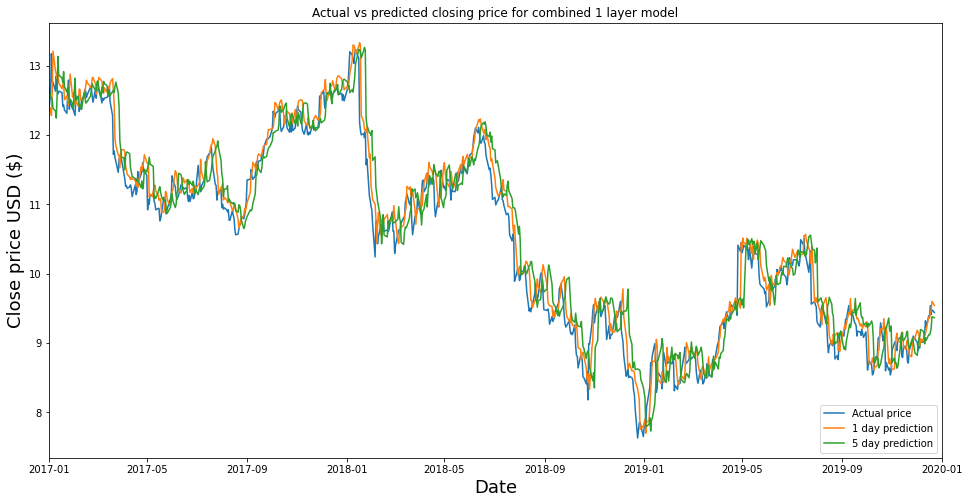

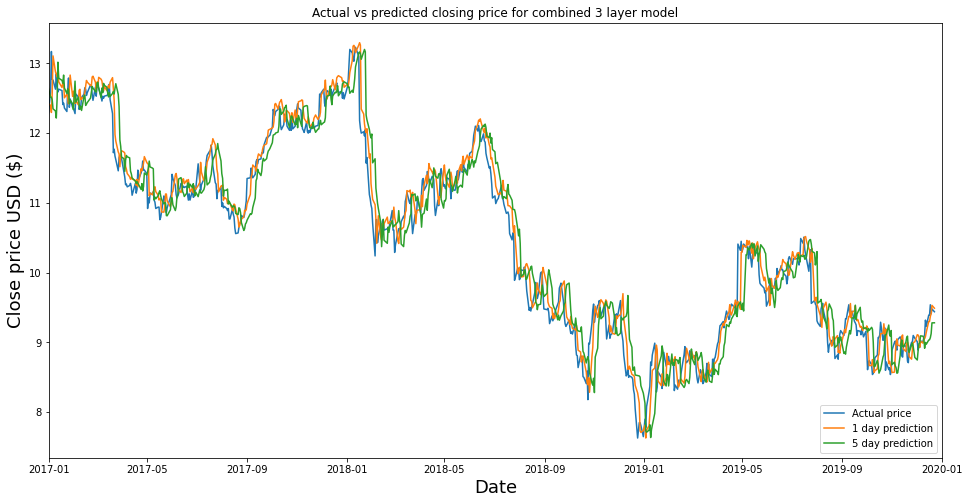

In [ ]:
#TODO: Fikse aksene her så de er slik vi vil ha de

# Plot actual closing price against predicted closing price for combined 1 layer model
plt.figure(figsize=(16,8))
plt.title('Actual vs predicted closing price for combined 1 layer model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(res_df_1_layer['Actual price'])
plt.plot(res_df_1_layer['1 day prediction'])
plt.plot(res_df_1_layer['5 day prediction'])
plt.xlim(datetime.date(2017,1,1), datetime.date(2020,1,1))
plt.legend(['Actual price', '1 day prediction', "5 day prediction"], loc='lower right')
plt.show()

# Plot actual closing price against predicted closing price for combined 3 layer model
plt.figure(figsize=(16,8))
plt.title('Actual vs predicted closing price for combined 3 layer model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(res_df_3_layer['Actual price'])
plt.plot(res_df_3_layer['1 day prediction'])
plt.plot(res_df_3_layer['5 day prediction'])
plt.xlim(datetime.date(2017,1,1), datetime.date(2020,1,1))
plt.legend(['Actual price', '1 day prediction', "5 day prediction"], loc='lower right')
plt.show()

# **Save combined models (optional)**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

#TODO: Change save names 
# Save model
model_1_layer.save('Combined-1-layer-model-F.h5')
model_1_layer_file = drive.CreateFile({'title' : 'Combined-1-layer-model-F.h5'})                       
model_1_layer_file.SetContentFile('Combined-1-layer-model-F.h5')                       
model_1_layer_file.Upload()

model_3_layer.save('Combined-3-layer-model-F.h5')
model_3_layer_file = drive.CreateFile({'title' : 'Combined-3-layer-model-F.h5'})                       
model_3_layer_file.SetContentFile('Combined-3-layer-model-F.h5')                       
model_3_layer_file.Upload()
 
 
#Get drive ID - MAKE SURE TO SAVE THE ID SOMEWHERE
print("Combined 1 layer model:")              
print(drive.CreateFile({'id': model_1_layer_file.get('id')}))
print("Combined 3 layer model:") 
print(drive.CreateFile({'id': model_3_layer_file.get('id')}))


Combined 1 layer model:
GoogleDriveFile({'id': '1_XEhbBeGJYaRjExwoD88MU0HfN5xfPiq'})
Combined 3 layer model:
GoogleDriveFile({'id': '1QJ7xmlFLcXrOQgG5GTxqNkGKK7Hqy3ZJ'})


# **Load model**

In [ ]:
#model = load_model("lstm-model.h5")
#model = model.summary()

In [ ]:
#Fjerne?
def save_model():
  model.save("lstm-model.h5")
#save_model()